             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

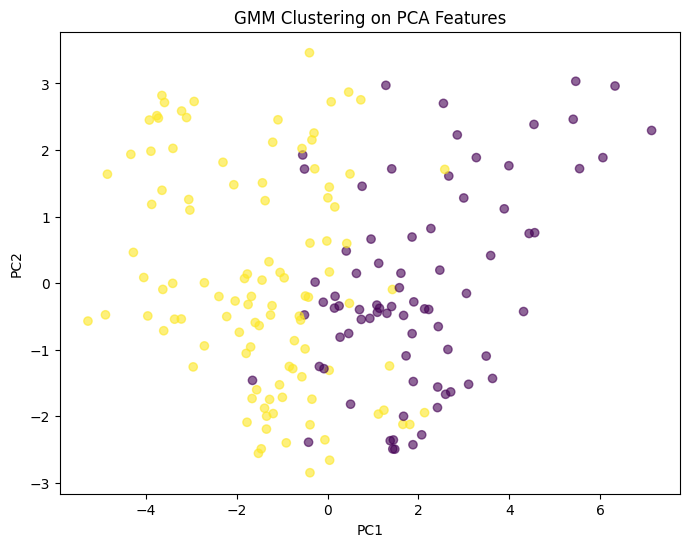

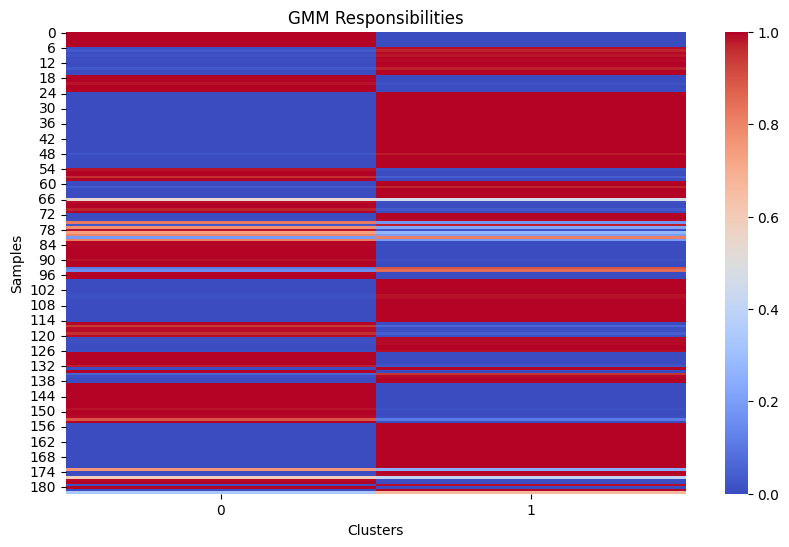

Fold 1


enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)


Epoch 10/50, Loss: 0.3728
Epoch 20/50, Loss: 0.2471
Epoch 30/50, Loss: 0.1932
Epoch 40/50, Loss: 0.1682
Epoch 50/50, Loss: 0.1997


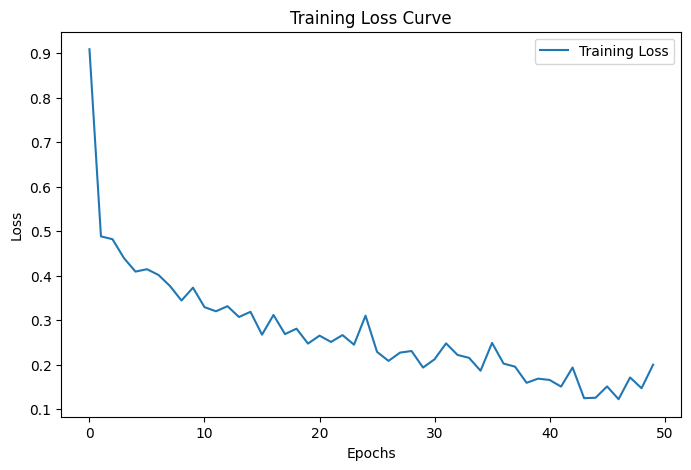

Accuracy: 0.9459
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
ROC-AUC: 0.9643
MCC: 0.8716
Balanced Accuracy: 0.9643
Fold 2


enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)


Epoch 10/50, Loss: 0.3086
Epoch 20/50, Loss: 0.2231
Epoch 30/50, Loss: 0.1863
Epoch 40/50, Loss: 0.2170
Epoch 50/50, Loss: 0.1255


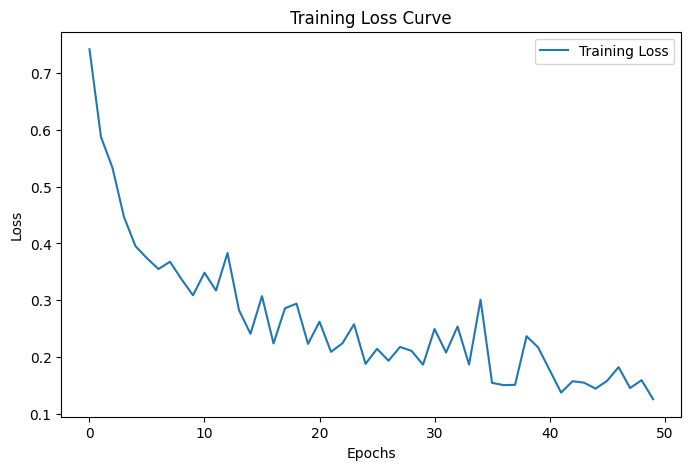

Accuracy: 0.9459
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630
ROC-AUC: 0.9643
MCC: 0.8716
Balanced Accuracy: 0.9643
Fold 3


enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)


Epoch 10/50, Loss: 0.2734
Epoch 20/50, Loss: 0.1630
Epoch 30/50, Loss: 0.1512
Epoch 40/50, Loss: 0.0809
Epoch 50/50, Loss: 0.1220


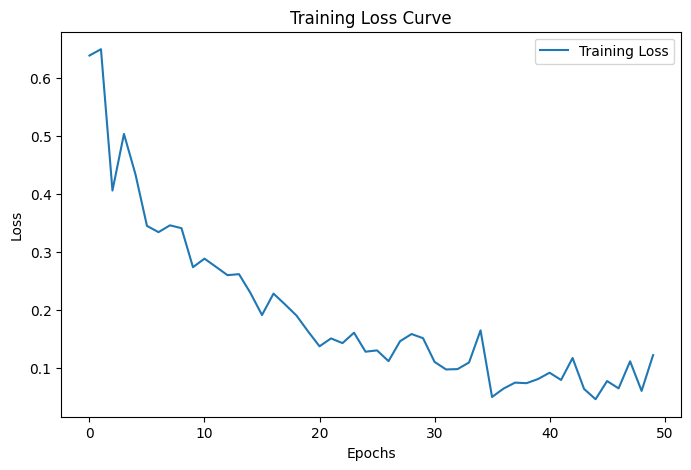

Accuracy: 0.7838
Precision: 0.9130
Recall: 0.7778
F1-Score: 0.8400
ROC-AUC: 0.7889
MCC: 0.5291
Balanced Accuracy: 0.7889
Fold 4


enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)


Epoch 10/50, Loss: 0.3224
Epoch 20/50, Loss: 0.2730
Epoch 30/50, Loss: 0.2028
Epoch 40/50, Loss: 0.1633
Epoch 50/50, Loss: 0.1056


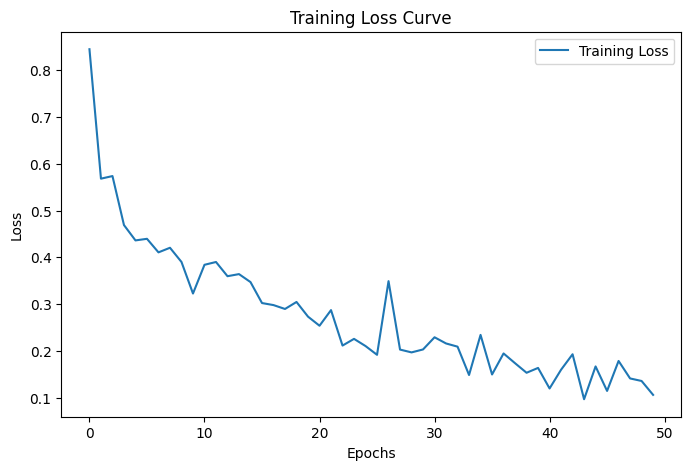

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
MCC: 1.0000
Balanced Accuracy: 1.0000
Fold 5


enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)


Epoch 10/50, Loss: 0.3095
Epoch 20/50, Loss: 0.2656
Epoch 30/50, Loss: 0.1615
Epoch 40/50, Loss: 0.1204
Epoch 50/50, Loss: 0.0960


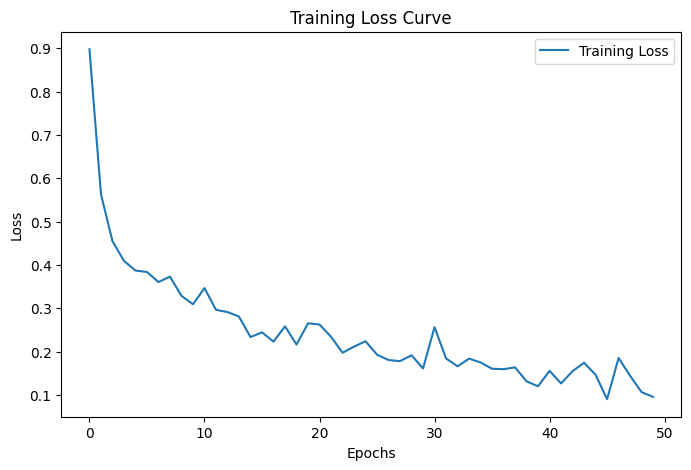

Using 147 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Accuracy: 0.8333
Precision: 0.9200
Recall: 0.8519
F1-Score: 0.8846
ROC-AUC: 0.8148
MCC: 0.5919
Balanced Accuracy: 0.8148
Mean Accuracy: 0.9018
Mean Precision: 0.9666
Mean Recall: 0.8974
Mean F1-Score: 0.9301
Mean ROC-AUC: 0.9065
Mean MCC: 0.7728
Mean Balanced Accuracy: 0.9065


  0%|          | 0/36 [00:00<?, ?it/s]

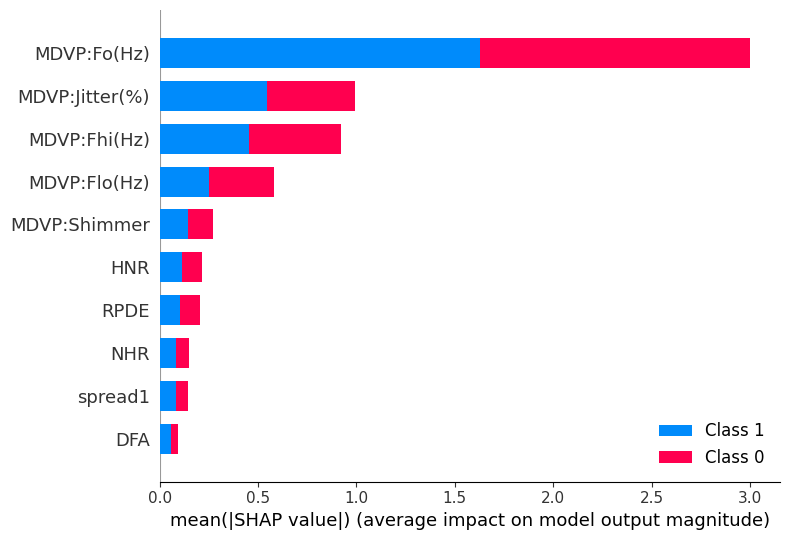

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix, balanced_accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
import seaborn as sns
import shap

# Define dataset paths
parkinsons_data_path = 'your_path'
telemonitoring_data_path = 'your_path'

# Load the datasets
parkinsons_data = pd.read_csv(parkinsons_data_path)
telemonitoring_data = pd.read_csv(telemonitoring_data_path)

# Display dataset previews
print(parkinsons_data.head())
print(telemonitoring_data.head())

# Feature selection based on domain knowledge
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer',
                     'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

# Add demographic features if available
demographic_features = ['age', 'gender']
for feature in demographic_features:
    if feature in parkinsons_data.columns:
        selected_features.append(feature)

X = parkinsons_data[selected_features]
y = parkinsons_data['status']  # Target variable

# Handle missing or outlier data
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
outlier_mask = (np.abs(X - np.mean(X, axis=0)) / np.std(X, axis=0) < 3).all(axis=1)
X = X[outlier_mask]
y = y[outlier_mask]  # Align target variable with filtered features

# Address class imbalance using class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply dimensionality reduction
pca = PCA(n_components=10)  # Reduce dimensionality to top 10 components
X_pca = pca.fit_transform(X_scaled)

# Map principal components back to feature names
pca_components = pd.DataFrame(pca.components_, columns=selected_features, index=[f'PC{i}' for i in range(pca.n_components_)])

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Transformer model for tabular data
class TabularTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, num_classes):
        super(TabularTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.dropout = nn.Dropout(0.3)  # Regularization
        self.fc = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)  # Linear projection
        x = self.dropout(x)  # Apply dropout
        x = x.unsqueeze(0)  # Add sequence_length dimension
        x = self.transformer(x)  # Transformer encoder
        x = x.mean(dim=0)  # Global average pooling over the sequence dimension
        x = self.fc(x)  # Fully connected layer
        return x

# Initialize Gaussian Mixture Model
def analyze_with_gmm():
    print("Training Gaussian Mixture Model...")
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm.fit(X_pca)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm.predict(X_pca), cmap='viridis', alpha=0.6)
    plt.title("GMM Clustering on PCA Features")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    # Visualize GMM responsibilities
    responsibilities = gmm.predict_proba(X_pca)
    plt.figure(figsize=(10, 6))
    sns.heatmap(responsibilities, cmap="coolwarm", cbar=True)
    plt.title("GMM Responsibilities")
    plt.xlabel("Clusters")
    plt.ylabel("Samples")
    plt.show()

analyze_with_gmm()

def train_and_evaluate():
    # Training and evaluation loop for cross-validation
    input_dim = X_pca.shape[1]
    model_dim = 64
    num_heads = 4
    num_layers = 2
    num_classes = 2
    epochs = 50
    all_metrics = []
    confusion_matrices = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_pca, y)):
        print(f"Fold {fold + 1}")

        # Split data
        X_train, X_test = X_pca[train_idx], X_pca[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Update class weights for this fold
        fold_class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        fold_class_weights = torch.tensor(fold_class_weights, dtype=torch.float32)

        # Convert data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

        # Initialize model
        model = TabularTransformer(input_dim, model_dim, num_heads, num_layers, num_classes)
        criterion = nn.CrossEntropyLoss(weight=fold_class_weights)
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Add L2 regularization

        # Training loop
        loss_history = []
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

        # Plot training loss
        plt.figure(figsize=(8, 5))
        plt.plot(range(epochs), loss_history, label="Training Loss")
        plt.title("Training Loss Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

        # Evaluation
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = accuracy_score(y_test_tensor, predicted)
            precision = precision_score(y_test_tensor, predicted)
            recall = recall_score(y_test_tensor, predicted)
            f1 = f1_score(y_test_tensor, predicted)
            roc_auc = roc_auc_score(y_test_tensor, predicted)
            mcc = matthews_corrcoef(y_test_tensor, predicted)
            balanced_acc = balanced_accuracy_score(y_test_tensor, predicted)
            all_metrics.append((accuracy, precision, recall, f1, roc_auc, mcc, balanced_acc))

            # Confusion matrix for this fold
            cm = confusion_matrix(y_test_tensor, predicted)
            confusion_matrices.append(cm)

            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1-Score: {f1:.4f}")
            print(f"ROC-AUC: {roc_auc:.4f}")
            print(f"MCC: {mcc:.4f}")
            print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Aggregate metrics across folds
    mean_metrics = np.mean(all_metrics, axis=0)
    print(f"Mean Accuracy: {mean_metrics[0]:.4f}")
    print(f"Mean Precision: {mean_metrics[1]:.4f}")
    print(f"Mean Recall: {mean_metrics[2]:.4f}")
    print(f"Mean F1-Score: {mean_metrics[3]:.4f}")
    print(f"Mean ROC-AUC: {mean_metrics[4]:.4f}")
    print(f"Mean MCC: {mean_metrics[5]:.4f}")
    print(f"Mean Balanced Accuracy: {mean_metrics[6]:.4f}")

    # Explainability using SHAP
    explainer = shap.KernelExplainer(
        model=lambda x: model.forward(torch.tensor(x, dtype=torch.float32)).detach().numpy(),
        data=X_train
    )
    shap_values = explainer.shap_values(X_test)

    # Replace feature indices with actual feature names
    shap.summary_plot(shap_values, X_test, feature_names=selected_features)

# Run training and evaluation
train_and_evaluate()
